# **Natural Language Processing with Python**
by [CSpanias](https://cspanias.github.io/aboutme/) - 01/2022

Content based on the [NLTK book](https://www.nltk.org/book/). <br>

You can find Chapter 2 [here](https://www.nltk.org/book/ch02.html).

# CONTENT

1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
    1. [Accessing Text Corpora](#AccessingCorpora)
        1. [Gutenberg Corpus](#Gutenberg)
        2. [Web and Chat Text](#WebChat)
        3. [Brown Corpus](#Brown)
        4. [Reuters Corpus](#Reuters)
        5. [Inaugural Address Corpus](#Inaugural)
        6. [Annotated Text Corpora](#Annotated)
        7. [Corpora in Other Languages](#OtherLanguages)
        8. [Text Corpus Structure](#Structure)
        9. [Loading Your Own Corpus](#LoadingCorpus)


**Install**, **import** and **download NLTK**. <br>

*Uncomment lines 2 and 5 if you haven't installed and downloaded NLTK yet.*

In [5]:
# install nltk
#!pip install nltk

# load nltk
import nltk

# download nltk
#nltk.download()

Load all items (9 texts) from **NLTK' book module**.

In [7]:
# load all items from NLTK’s book module.
from nltk.book import *

## 2.1 Accessing Text Corpora
`from nltk.corpus import corpora_name`

<a name="Gutenberg"></a>
### 2.1.1 [Gutenberg Corpus](https://www.gutenberg.org/)
`from nltk.corpus import gutenberg`

A small selection of texts from the **Project Gutenberg electronic text archive**, which contains some 25,000 free electronic books, hosted at [http://www.gutenberg.org/](http://www.gutenberg.org/).

In [16]:
from nltk.corpus import gutenberg

# get the file names
for file in gutenberg.fileids():
    print(file, end=", ")

austen-emma.txt, austen-persuasion.txt, austen-sense.txt, bible-kjv.txt, blake-poems.txt, bryant-stories.txt, burgess-busterbrown.txt, carroll-alice.txt, chesterton-ball.txt, chesterton-brown.txt, chesterton-thursday.txt, edgeworth-parents.txt, melville-moby_dick.txt, milton-paradise.txt, shakespeare-caesar.txt, shakespeare-hamlet.txt, shakespeare-macbeth.txt, whitman-leaves.txt, 

In [27]:
emma = gutenberg.words("austen-emma.txt")
print(emma)
print("The length of the book is: {} tokens.".format(len(emma)))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]
The length of the book is: 192427 tokens.


In [30]:
for fileid in gutenberg.fileids():
    # access letters, raw
    num_chars = len(gutenberg.raw(fileid))
    # access words
    num_words = len(gutenberg.words(fileid))
    # access sentences
    num_sents = len(gutenberg.sents(fileid))
    # lowercase and remove duplicate words 
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    
    print(
        # average number of letters per word
        "Mean word length:", round(num_chars/num_words),
        # average number of words per sentence
        "Mean sentence length:", round(num_words/num_sents),
        # average number of unique words
        "Lexical diversity score:", round(num_words/num_vocab),
        # file name
        fileid)

Mean word length: 5 Mean sentence length: 25 Lexical diversity score: 26 austen-emma.txt
Mean word length: 5 Mean sentence length: 26 Lexical diversity score: 17 austen-persuasion.txt
Mean word length: 5 Mean sentence length: 28 Lexical diversity score: 22 austen-sense.txt
Mean word length: 4 Mean sentence length: 34 Lexical diversity score: 79 bible-kjv.txt
Mean word length: 5 Mean sentence length: 19 Lexical diversity score: 5 blake-poems.txt
Mean word length: 4 Mean sentence length: 19 Lexical diversity score: 14 bryant-stories.txt
Mean word length: 4 Mean sentence length: 18 Lexical diversity score: 12 burgess-busterbrown.txt
Mean word length: 4 Mean sentence length: 20 Lexical diversity score: 13 carroll-alice.txt
Mean word length: 5 Mean sentence length: 20 Lexical diversity score: 12 chesterton-ball.txt
Mean word length: 5 Mean sentence length: 23 Lexical diversity score: 11 chesterton-brown.txt
Mean word length: 5 Mean sentence length: 18 Lexical diversity score: 11 chesterton-

In [42]:
# access letters
for letter in gutenberg.raw("blake-poems.txt")[:10]:
    print(letter, end="-")

print("\n")
# access words
for word in gutenberg.words("blake-poems.txt")[:10]:
    print(word, end="-")
    
print("\n")
# access sentences
for sentence in gutenberg.sents("blake-poems.txt")[:10]:
    print(sentence, end="-")

[-P-o-e-m-s- -b-y- -

[-Poems-by-William-Blake-1789-]-SONGS-OF-INNOCENCE-

['[', 'Poems', 'by', 'William', 'Blake', '1789', ']']-['SONGS', 'OF', 'INNOCENCE', 'AND', 'OF', 'EXPERIENCE', 'and', 'THE', 'BOOK', 'of', 'THEL']-['SONGS', 'OF', 'INNOCENCE']-['INTRODUCTION']-['Piping', 'down', 'the', 'valleys', 'wild', ',', 'Piping', 'songs', 'of', 'pleasant', 'glee', ',', 'On', 'a', 'cloud', 'I', 'saw', 'a', 'child', ',', 'And', 'he', 'laughing', 'said', 'to', 'me', ':']-['"', 'Pipe', 'a', 'song', 'about', 'a', 'Lamb', '!"']-['So', 'I', 'piped', 'with', 'merry', 'cheer', '.']-['"', 'Piper', ',', 'pipe', 'that', 'song', 'again', ';"', 'So', 'I', 'piped', ':', 'he', 'wept', 'to', 'hear', '.']-['"', 'Drop', 'thy', 'pipe', ',', 'thy', 'happy', 'pipe', ';', 'Sing', 'thy', 'songs', 'of', 'happy', 'cheer', ':!"']-['So', 'I', 'sang', 'the', 'same', 'again', ',', 'While', 'he', 'wept', 'with', 'joy', 'to', 'hear', '.']-

<a name="WebChat"></a>
### 2.1.2 Web and Chat Text
`from nltk.corprus import webtext` <br>

NLTK’s collection of web text includes:
1. content from a Firefox discussion forum
1. conversations overheard in New York
1. the movie script of Pirates of the Carribean
1. personal advertisements
1. wine reviews

In [52]:
from nltk.corpus import webtext

for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:30], "...")

firefox.txt Cookie Manager: "Don't allow s ...
grail.txt SCENE 1: [wind] [clop clop clo ...
overheard.txt White guy: So, do you have any ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD ...
singles.txt 25 SEXY MALE, seeks attrac old ...
wine.txt Lovely delicate, fragrant Rhon ...


`from nltk.corpus import nps_chat`

A corpus of instant messaging chat sessions:
* originally collected by the Naval Postgraduate School (nps) for research on **automatic detection of Internet predators**
* contains **over 10,000 posts**, anonymized by replacing usernames with generic names of the form “UserNNN”, and manually edited to remove any other identifying information
* organized into **15 files**, where each file contains several hundred posts collected on a given data, for an **age-specific chatroom** (teens, 20s, 30s, 40s, plus a generic adults chatroom).
* the **filename** contains the date, chatroom, and number of posts; e.g., 10-19-20s_706posts.xml contains 706 posts gathered from the 20s chat room on 10/19/2006.

In [54]:
from nltk.corpus import nps_chat

# print the file names
for fileid in nps_chat.fileids()[:5]:
    print(fileid)
    
# assign chat posts in a variable
chatroom = nps_chat.posts("10-26-teens_706posts.xml")

# total number of posts in this file
print("\nThe total number of posts in this file is:", len(chatroom))

# a random post
print("\nThe post {} contains the following words: {}.".format(15, chatroom[15]))

10-19-20s_706posts.xml
10-19-30s_705posts.xml
10-19-40s_686posts.xml
10-19-adults_706posts.xml
10-24-40s_706posts.xml

The total number of posts in this file is: 706

The post 15 contains the following words: ['.', 'ACTION', 'this', 'song', 'has', 'been', 'played', '.', '13', '1', 'times', '.. .', 'this', 'song', 'lasts', '06.', 'minutes', '/', 'seconds', '.', 'it', "'s", 'my', 'Music', '.'].


<a name="Brown"></a>
### 2.1.3 [Brown Corpus](http://icame.uib.no/brown/bcm-los.html)
`from nltk.corprus import brown` <br>

* the first **million-word** electronic corpus of English
* created in **1961** at Brown University
* contains text from **500 sources**
* the sources have been **categorized by genre**

In [62]:
from nltk.corpus import brown

# access genres
print(brown.categories(), "\n")

# access words of a genre
print(brown.words(categories="humor")[:10])

# access the first 10 file names
print("\n", brown.fileids()[:10])

# 
print("\n", brown.sents(categories=['news', 'reviews'])[:2])

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction'] 

['It', 'was', 'among', 'these', 'that', 'Hinkle', 'identified', 'a', 'photograph', 'of']

 ['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10']

 [['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']]


The Brown Corpus is a convenient resource for studying **systematic differences between genres**, a kind of linguistic inquiry known as **stylistics**.

In [66]:
# assign the words in the "news" genre to a variable
news_text = brown.words(categories='news')

# create a frequency distribution for each word
fd_news = nltk.FreqDist(w.lower() for w in news_text)

# create a list with words we are interested to explore
modals = ['can', 'could', 'may', 'might', 'must', 'will']

# for each word in the list modals
for m in modals:
    # print the word and his frequency distribution 
    print(m + ':', fd_news[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [67]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)  
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
        
genres = ['news', 'religion', 'hobbies', 'science_fiction',
          'romance', 'humor']

cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


The most frequent modal in the **news** genre is **will**, while in the **romance** genre is **could**.

<a name="Reuters"></a>
### 2.1.4 Reuters
`from nltk.corprus import reuters` <br>

* It contains **10,788 news documents** totalling 1.3 million words.
* The documents are classified into **90 topics**, and grouped into two sets, “training”/“test”.
* For example, the text with fileid‘test/14826’ is a document drawn from the test set.
* The split is for training and testing algorithms that **automatically detect the topic of a document**.

In [69]:
from nltk.corpus import reuters

# access the first 10 file names
print(reuters.fileids()[:10], "\n")

# access the first 10 topics
print(reuters.categories()[:10], "\n")

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843'] 

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee'] 



Unlike the Brown corpus, **categories** in the Reuters corpus **overlap with each other**, because a news story often covers multiple topics. 

We can obtain for the **topics covered by one or more documents**, or for the **documents included in one or more categories**.

In [85]:
# access particular category(ies)
print(reuters.fileids('barley')[:10], "\n")
print(reuters.fileids(['barley', 'grain'])[:10], "\n")

# access particular file(s)
print(reuters.categories(['training/395']), "\n")
print(reuters.categories(['test/14828', 'test/14829']))

['test/15618', 'test/15649', 'test/15676', 'test/15728', 'test/15871', 'test/15875', 'test/15952', 'test/17767', 'test/17769', 'test/18024'] 

['test/14828', 'test/14832', 'test/14841', 'test/14858', 'test/15033', 'test/15043', 'test/15097', 'test/15106', 'test/15132', 'test/15271'] 

['barley', 'corn', 'grain', 'wheat'] 

['crude', 'grain', 'nat-gas']


Similarly, we can **specify the words or sentences we want** in terms of files or categories. 

The first handful of words in each of these texts are the titles, which by convention are stored as upper case.

In [86]:
# access the first 10 words of the specified file
print(reuters.words("training/395")[:10], "\n")

# access the first 10 words of the specified categories
print(reuters.words(categories=['barley', 'corn'])[:10])

['FRENCH', 'ESTIMATE', '86', '/', '87', 'WHEAT', 'DELIVERIES', 'UNCHANGED', 'The', 'French'] 

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', 'QUARTER', 'Thailand', "'", 's']


<a name="Inaugural"></a>
### 2.1.5 Inaugural Address Corpus
`from nltk.corprus import inaugural` <br>

1. A collection of **55 texts**, one for each **presidential address**
1. Its **time dimension** is an interesting property

In [87]:
from nltk.corpus import inaugural

# access the first 10 files
print(inaugural.fileids()[:10], "\n")

# create a list with just the year of each speech, i.e. the first 4 words
years = [fileid[:4] for fileid in inaugural.fileids()]
# print the first 10 elements of the years list
print(years[:10])

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt'] 

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825']


Look at how the words **America** and **citizen** are used over time:

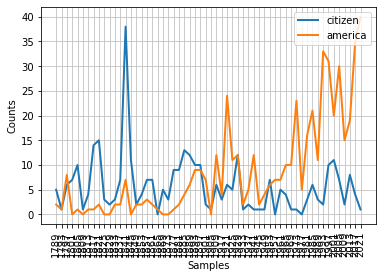

In [88]:
cfd = nltk.ConditionalFreqDist(
    # create a conditional frequency distribution for our words of interest
    (target, fileid[:4])
    # for each file name in all files
    for fileid in inaugural.fileids()
    # for each word in the words of each file
    for w in inaugural.words(fileid)
    # assign the words of insterest in the variable target
    for target in ['america', 'citizen']
    # lowercase words and check if they start with our words of interest
    if w.lower().startswith(target)
)

# plot the conditional frequency distribution
cfd.plot();

All words in the Inaugural Address Corpus that begin with america or citizen are counted; separate counts are kept for each address; these are plotted so that trends in usage over time can be observed; counts are not normalized for document length.

<a name="Annotated"></a>
### 2.1.6 Annotated Text Corpora
Many text corpora contain **linguistic annotations**, representing POS tags, named entities, syntactic structures, semantic roles, and so forth. 

NLTK provides convenient ways to access several of these corpora, and has data packages containing corpora and corpus samples, freely downloadable for use in **teaching** and **research**.

For information about downloading them, see [nltk.org/data](http://nltk.org/data). 

For more examples of how to access NLTK corpora, please consult the **Corpus HOWTO** at [nltk.org/howto](http://nltk.org/howto).

`from nltk.corpus import udhr`

**udhr** contains the **Universal Declaration of Human Rights in over 300 languages**. The fields include information about the **character encoding** used in the file, such as UTF8 or Latin1.

['Abkhaz-Cyrillic+Abkh', 'Abkhaz-UTF8', 'Achehnese-Latin1', 'Achuar-Shiwiar-Latin1', 'Adja-UTF8', 'Afaan_Oromo_Oromiffa-Latin1', 'Afrikaans-Latin1', 'Aguaruna-Latin1', 'Akuapem_Twi-UTF8', 'Albanian_Shqip-Latin1'] 

['Greek_Ellinika-Greek', 'Greek_Ellinika-UTF8'] 

['ΟΙΚΟΥΜΕΝΙΚΗ', 'ΔΙΑΚΗΡΥΞΗ', 'ΓΙΑ', 'ΤΑ', 'ΑΝΘΡΩΠΙΝΑ', 'ΔΙΚΑΙΩΜΑΤΑ', '10', 'ΔΕΚΕΜΒΡΙΟΥ', '1948', 'ΠΡΟΟΙΜΙΟ']


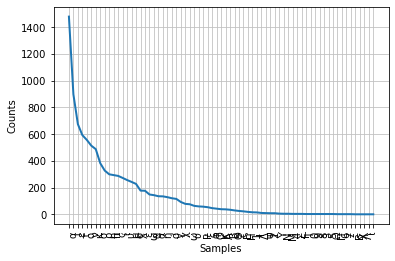

In [96]:
from nltk.corpus import udhr

# access the first 10 files
print(udhr.fileids()[:10], "\n")

# for each file in udhr files get the files that start with 'Greek'
greek = [file for file in udhr.fileids() if file.startswith('Greek')]

# print the resulted files
print(greek, "\n")

# access the first 10 words of the greek file
print(udhr.words(greek[0])[:10])

# create a FreqDist
raw_text = udhr.raw(greek[0])
nltk.FreqDist(raw_text).plot();

Cumulative Frequency Distribution plot for **different languages**:

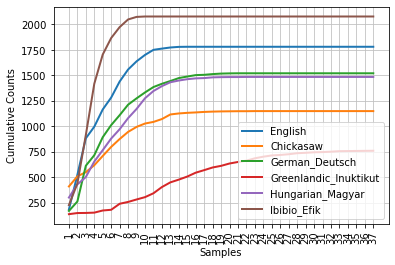

In [91]:
# create a list with the desired languages
languages = ['English', 'Chickasaw', 'German_Deutsch', 
            'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

# create a conditional frequency distribution for each word
cfd = nltk.ConditionalFreqDist(
        (language, len(word))
        for language in languages
        for word in udhr.words(language + '-Latin1')
    )

# plot the results
cfd.plot(cumulative=True);

Words having five or fewer letters account for about 80% of Ibibio text, 60% of German text, and 25% of Inuktitut text!

<a name="Structure"></a>
### 2.1.8 Text Corpus Structure
**Common structures**:

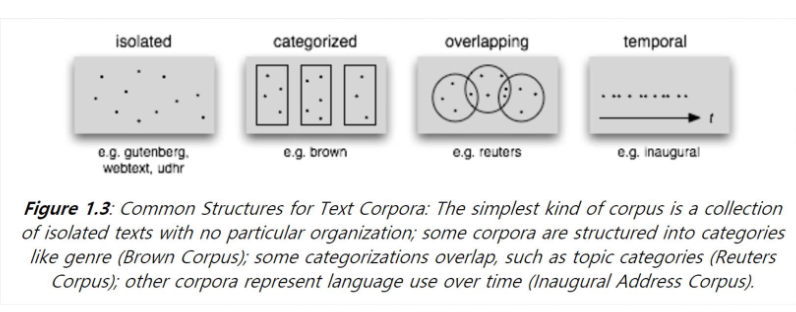

More info [here](https://www.nltk.org/howto/corpus.html).

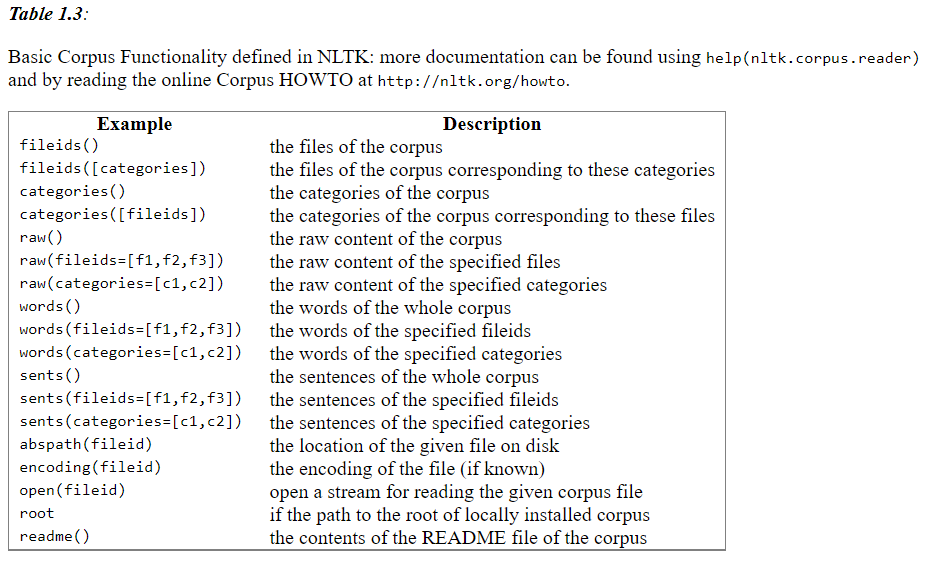

<a name="LoadingCorpus"></a>
### 2.1.9 Loading your Own Corpus
`from nltk.corpus import PlaintextCorpusReader`

If you have your **own collection of text files that you would like to access using the above methods**, you can easily load them with the help of NLTK's **PlaintextCorpusReader**. 

Whatever the location, set this to be the value of **corpus_root**. 

The second parameter of the PlaintextCorpusReader initializer can be a **list of fileids**, like `'a.txt', 'test/b.txt'`, or **a pattern that matches all fileids**, like `[abc\]/.*\.txt'`, i.e. a **regex**.

In [110]:
from nltk.corpus import PlaintextCorpusReader

# the path where a folder with some files is located
corpus_root = r"C:\Users\10inm\ai_bootcamp\test_corpus"

# instantiate Reader with the files inside the folder
# '.*' captutes every file, e.g. '.txt', '.pdf', etc.
wordlists = PlaintextCorpusReader(corpus_root, '.*')

# access the folder's files
print(wordlists.fileids(), "\n")

# access the word of the file
print(wordlists.words("sample.txt"))

['sample.txt', 'sample1.txt', 'sample1_txt.txt'] 

['1', '.', 'How', 'many', 'lines', 'do', 'we', 'write', ...]
